## Introduction to Time Series and Forecasting

Based on the book [Introduction to Time Series and Forecasting](http://www.masys.url.tw/Download/2002-Brockwell-Introduction%20Time%20Series%20and%20Forecasting.pdf) by Brockwell and Davis


### Examples of Time Series



#### Australian red wine "sales", (thousands of litres) monthly, Jan 80 - Oct 91

The file `australian-wine-sales.txt` contains the monthly sales of Australian red wines in for the period Jan-1980 to Oct-1991. Let's take a peak at the data file:

In [38]:
!head -5 data/australian-wine-sales.txt

Date	Sales
Jan-80	464
Feb-80	675
Mar-80	703
Apr-80	887


In [39]:
!tail -5 data/australian-wine-sales.txt

Jun-91	1892
Jul-91	2920
Aug-91	2572
Sep-91	2617
Oct-91	2047

We will use Pandas and the `read_csv` function to read the text file into a dataframe.

In [40]:
import pandas as pd

df = pd.read_csv("data/australian-wine-sales.txt", sep='\t')

In [41]:
df.head(5)

,Date,Sales
0,Jan-80,464
1,Feb-80,675
2,Mar-80,703
3,Apr-80,887
4,May-80,1139


Pandas is relatively smart and can infer the data type of a column.  

In [42]:
df.dtypes

Date     object
Sales     int64
dtype: object

In this case it figured out that `Sales` is a number, but not that `Date` is a date. 

We can now try to plot directly the contents of the dataframe.

In [43]:
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn-poster')


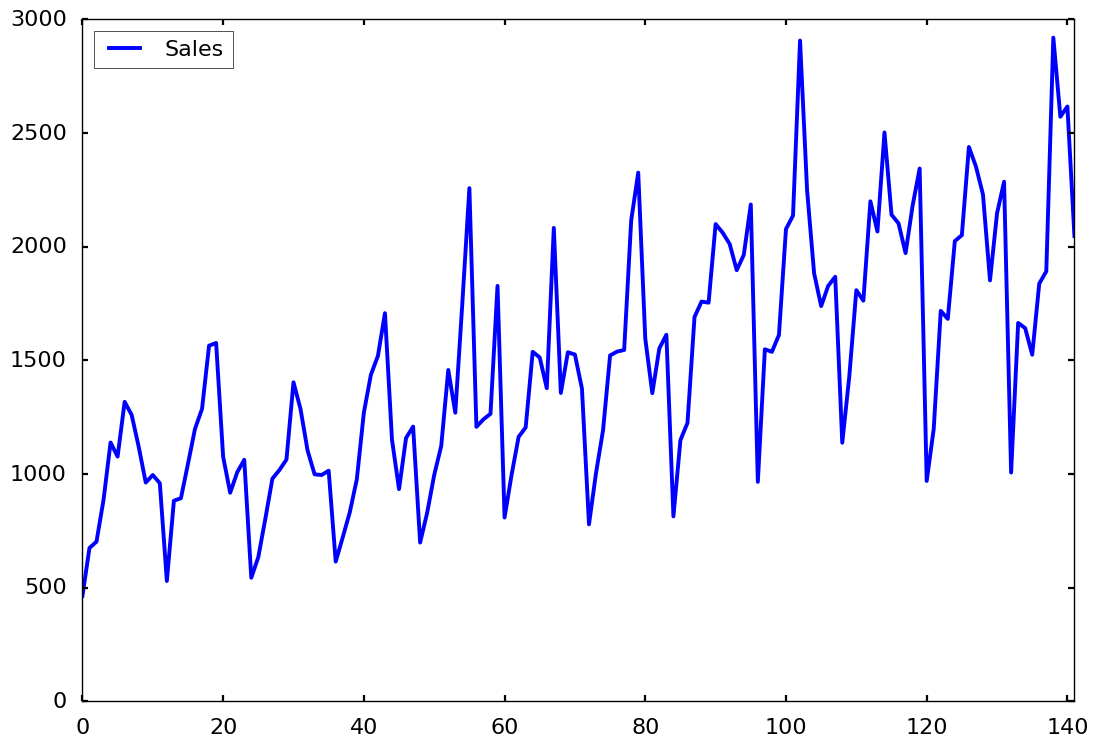

In [44]:

df.plot()

The plot would look better if we had the x-axis to be a date, instead of a number. For that, we use the corresponding Pandas functions to convert the columns into the appropriate formats. We also tell Pandas to convert the `Date` column into the key for each row.

In [45]:
# See https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior for parsing dates
# In our case %b is "Month as locale’s abbreviated name." and %y is "Year without century as a zero-padded decimal number."
df["Date"] = pd.to_datetime(df["Date"], format='%b-%y')
df["Sales"] = pd.to_numeric(df["Sales"])
df.set_index(keys="Date", inplace=True)
df.head(5)

,Sales
Date,
1980-01-01,464
1980-02-01,675
1980-03-01,703
1980-04-01,887
1980-05-01,1139


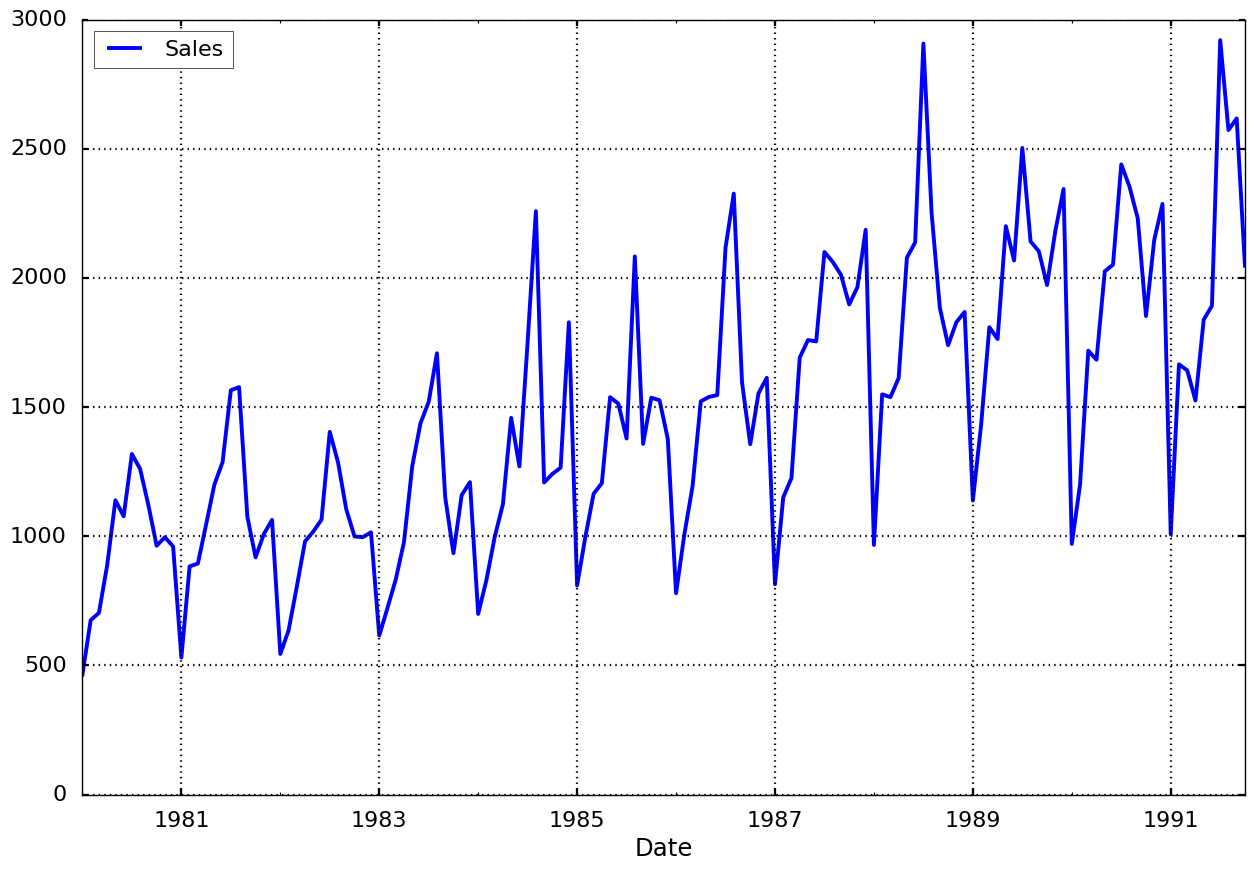

In [46]:
df.plot(figsize=(15,10), grid=True)

It appears from the graph that the sales have an upward trend and a seasonal pattern with a peak in July and a trough in January.

#### The monthly accidental deaths data, 1973–1978

In [15]:
!cat data/acc-deaths.txt

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1973  9007  8106  8928  9137 10017 10826 11317 10744  9713  9938  9161  8927
1974  7750  6981  8038  8422  8714  9512 10120  9823  8743  9129  8710  8680
1975  8162  7306  8124  7870  9387  9556 10093  9620  8285  8466  8160  8034
1976  7717  7461  7767  7925  8623  8945 10078  9179  8037  8488  7874  8647
1977  7792  6957  7726  8106  8890  9299 10625  9302  8314  8850  8265  8796
1978  7836  6892  7791  8192  9115  9434 10484  9827  9110  9070  8633  9240

This is a different type format that the file that we had before. First of all, we have _fixed width_ columns, and not a tab-separated file. So instead of using the `read_csv` command, we will use the `read_fwf` command to read the data.

In [24]:
df = pd.read_fwf("data/acc-deaths.txt")
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1,1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
2,1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8466,8160,8034
3,1976,7717,7461,7767,7925,8623,8945,10078,9179,8037,8488,7874,8647
4,1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
5,1978,7836,6892,7791,8192,9115,9434,10484,9827,9110,9070,8633,9240


##### Melt and Pivot_Table

Now we want to take the month-columns, and convert the file into a file with the format `<date>`, `<value>`.

The command for this is the [melt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) command. (For the opposite operation, use the [pivot_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) function.)

In [25]:
df = pd.melt(df, id_vars=['Year'], 
        value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        var_name='Month', value_name='Deaths')
df.head(5)

,Year,Month,Deaths
0,1973,Jan,9007
1,1974,Jan,7750
2,1975,Jan,8162
3,1976,Jan,7717
4,1977,Jan,7792


Now, we want to merge the month and year columns, to create a Date column.

In [27]:
# Notice the use of .astype(str) function that converts the int64 datatype into a string.
# Without that function, we get an error message that we cannot add an integer (Year) with a string (Month)
df["Date"] = df["Month"] + "-" + df["Year"].astype(str)
df

,Year,Month,Deaths,Date
0,1973,Jan,9007,Jan-1973
1,1974,Jan,7750,Jan-1974
2,1975,Jan,8162,Jan-1975
3,1976,Jan,7717,Jan-1976
4,1977,Jan,7792,Jan-1977
5,1978,Jan,7836,Jan-1978
6,1973,Feb,8106,Feb-1973
7,1974,Feb,6981,Feb-1974
8,1975,Feb,7306,Feb-1975
9,1976,Feb,7461,Feb-1976


In [29]:
df.dtypes

Year       int64
Month     object
Deaths     int64
Date      object
dtype: object

In [30]:
df["Date"] = pd.to_datetime(df["Date"], format='%b-%Y')
df

,Year,Month,Deaths,Date
0,1973,Jan,9007,1973-01-01
1,1974,Jan,7750,1974-01-01
2,1975,Jan,8162,1975-01-01
3,1976,Jan,7717,1976-01-01
4,1977,Jan,7792,1977-01-01
5,1978,Jan,7836,1978-01-01
6,1973,Feb,8106,1973-02-01
7,1974,Feb,6981,1974-02-01
8,1975,Feb,7306,1975-02-01
9,1976,Feb,7461,1976-02-01


In [31]:
df.set_index(keys="Date", inplace=True)

Now, that we have the Date column, we can delete the month and year columns. Notice the `axis=1` part: this means that we drop a _column_ with that name. If we used `axis=0`, then Pandas would have been looking for a _row_ with that key to drop.

In [32]:
df.drop("Month", axis=1, inplace=True)
df.drop("Year", axis=1, inplace=True)

In [33]:
df.head(5)

,Deaths
Date,
1973-01-01,9007
1974-01-01,7750
1975-01-01,8162
1976-01-01,7717
1977-01-01,7792


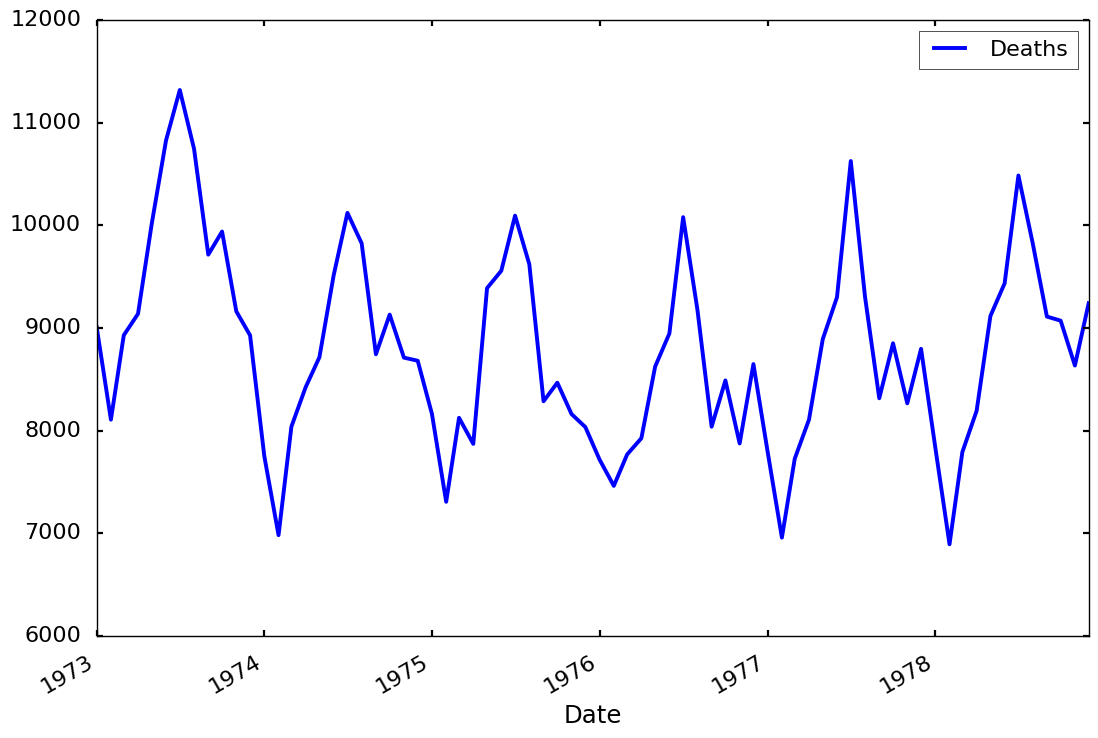

In [34]:
df.plot()

Like the red wine sales, the monthly accidental death ﬁgures show a strong seasonal pattern, with the maximum for each year occurring in July and the minimum for each year occurring in February. The presence of a trend  is much less apparent than in the wine sales. Later in this module, we will how we often represent the data as the sum of a trend, a seasonal component, and a residual term.

#### US Strikes (1968-1976) and economic output

The data is the same data as originally used in J. Kennan, "The Duration of Contract strikes in U.S. Manufacturing", 
Journal of Econometrics, 1985, Vol. 28, pp.5-28. The data is monthly U.S. data from 1968(1) to 1976(12).

* STRIKES is number of strikes (number of contract strikes in U.S. manufacturing beginning each month) 
* OUTPUT is level of economic activity (measured as cyclical departure of aggregate production from its trend level) 


In [88]:
!head -5 data/strikes.tsv

DATE	STRIKES	OUTPUT
Jan-68	5	0.01517
Feb-68	4	0.00997
Mar-68	6	0.0117
Apr-68	16	0.00473


In [89]:
df = pd.read_csv("data/strikes.tsv", sep='\t')
df["DATE"] = pd.to_datetime(df["DATE"], format='%b-%y')

df.head(5)

,DATE,STRIKES,OUTPUT
0,2068-01-01,5,0.01517
1,2068-02-01,4,0.00997
2,2068-03-01,6,0.01170
3,2068-04-01,16,0.00473
4,2068-05-01,5,0.01277


In [90]:
df.dtypes

DATE       datetime64[ns]
STRIKES             int64
OUTPUT            float64
dtype: object

Oops, we have a problem. According to https://docs.python.org/2/library/time.html when we have a 2-digit year, "_values 69-99 are mapped to 1969-1999, and values 0–68 are mapped to 2000–2068_".

We now need to write a function that will edit the year-parsing problem.

In [91]:
from pandas.tseries.offsets import *

def fix_year(dt):
    if dt.year > 2050:
        return dt - DateOffset(years=100)
    else:
        return dt

And then apply the function to the dataframe column using the `map` command.

In [92]:
df["DATE"] = df["DATE"].map(fix_year)
df

,DATE,STRIKES,OUTPUT
0,1968-01-01,5,0.01517
1,1968-02-01,4,0.00997
2,1968-03-01,6,0.01170
3,1968-04-01,16,0.00473
4,1968-05-01,5,0.01277
5,1968-06-01,8,0.01138
6,1968-07-01,8,0.00424
7,1968-08-01,9,-0.00687
8,1968-09-01,10,-0.00023
9,1968-10-01,10,0.00791


In [93]:
df.set_index(keys="DATE", inplace=True)

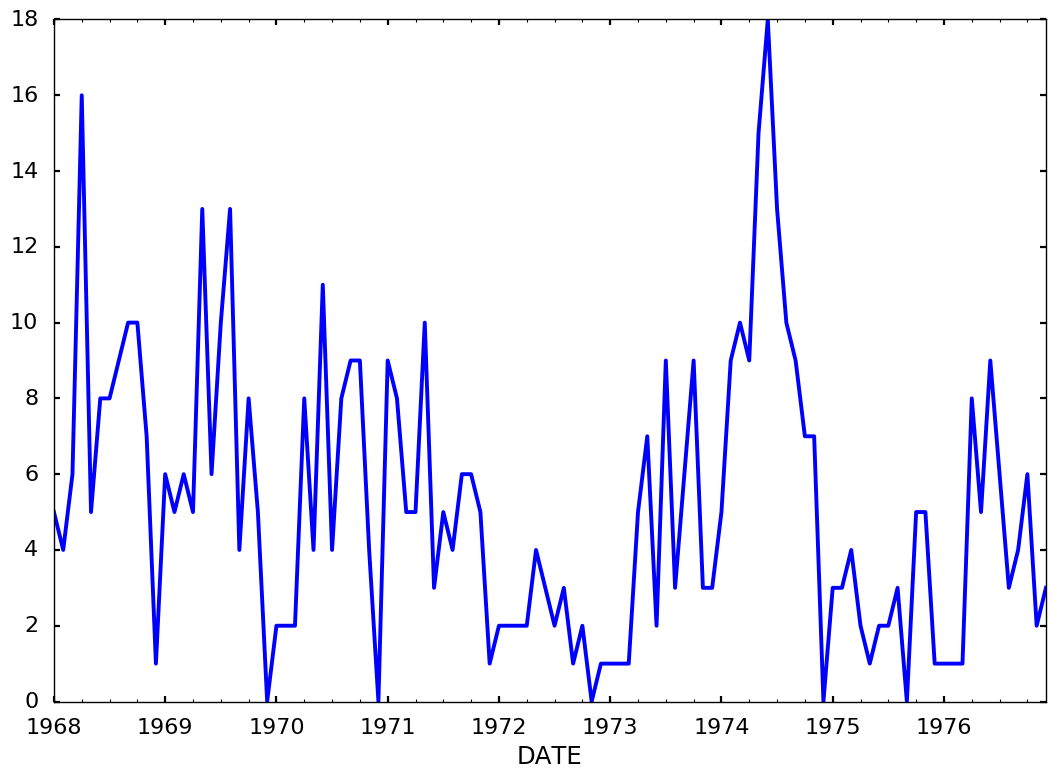

In [94]:
df["STRIKES"].plot()

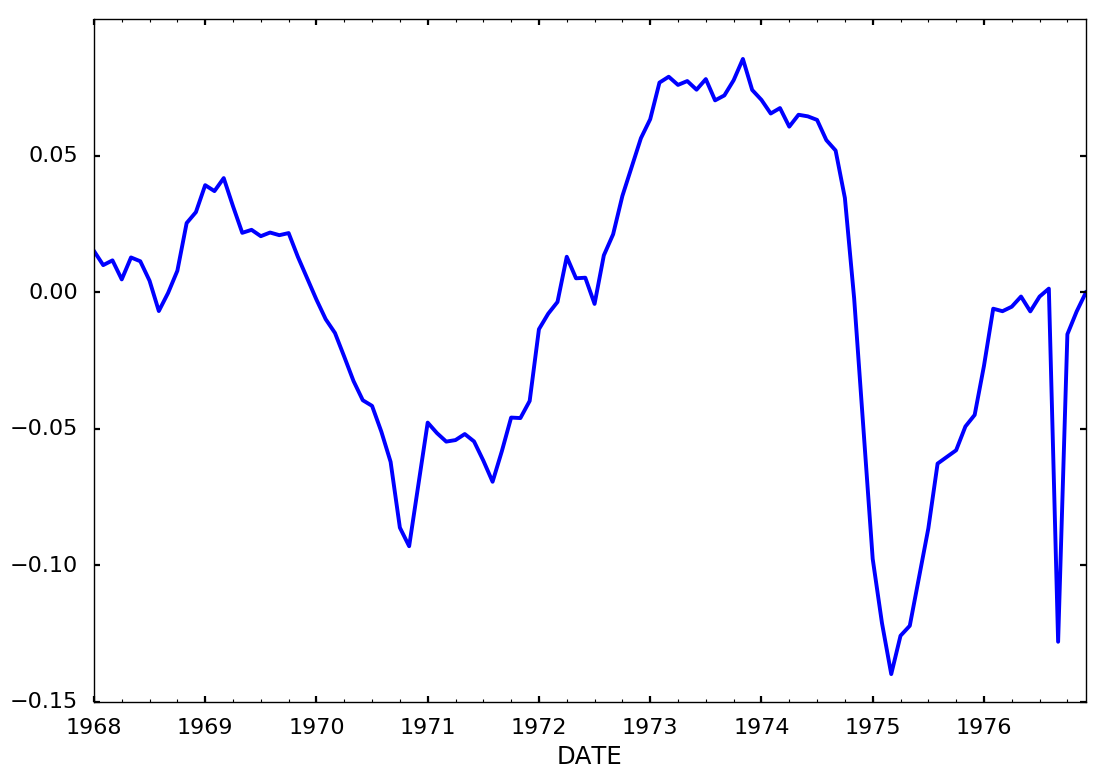

In [95]:
df["OUTPUT"].plot()

#### US Population Recorded by the US Census

In [21]:
!head -5 us-population2.txt

Year US_Population
1780 2,780,369
1790 3,929,214
1800 5,308,483
1810 7,239,881


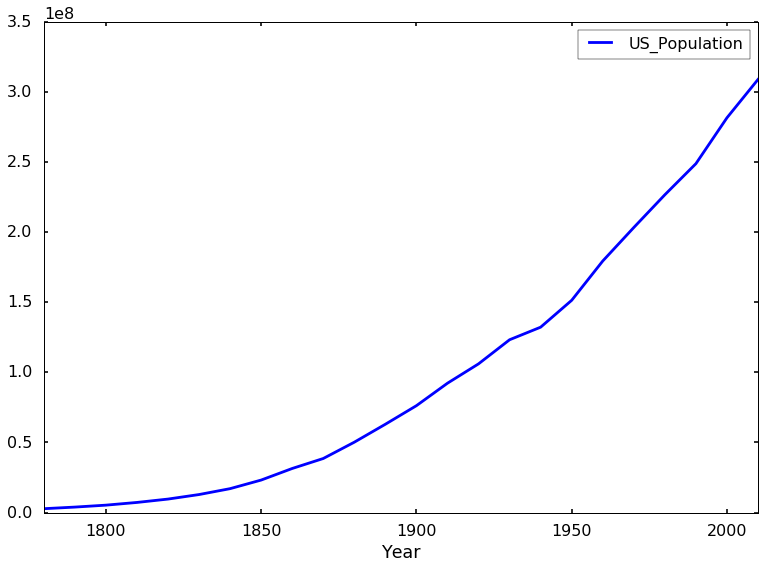

In [22]:
# We use the thousands=',' option to properly convert the population numbers to integers
df = pd.read_csv("us-population2.txt", sep=' ', thousands=',')
df["Year"] = pd.to_numeric(df["Year"])
df["US_Population"] = pd.to_numeric(df["US_Population"])
df.set_index(keys="Year", inplace=True)

df.plot()

#### Level of Lake Huron 1875--1972 

Annual measurements of the level, in feet, of Lake Huron 1875--1972

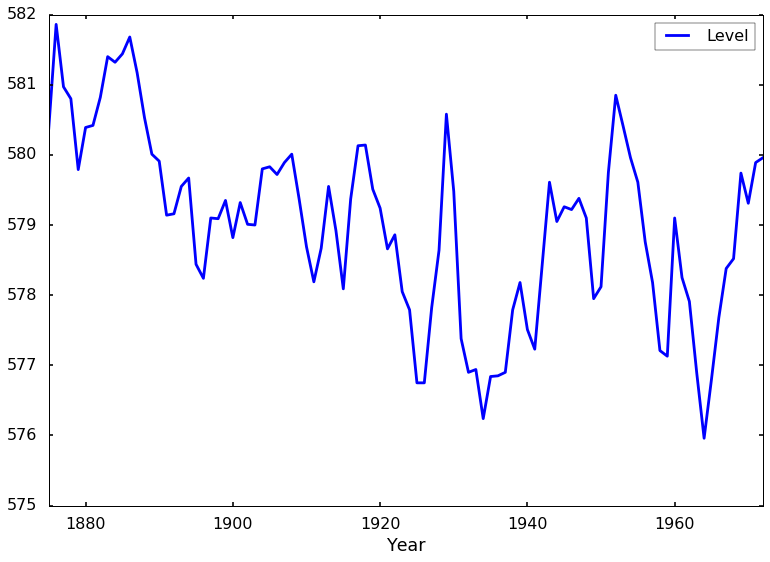

In [23]:
df = pd.read_csv("lake-huron.txt", sep='\t')
df.set_index(keys="Year", inplace=True)
df.plot()

### Objectives of Time Series Analysis

The examples above are an extremely small sample from the multitude of time series encountered in the ﬁelds of engineering, science, sociology, and economics.

A common objective of any time series analysis is to "understand" the data. While the exact semantics of the term "understand" will vary, a common objective of all the analysis will be to create a *model* that describes the data.

#### What is a time series model?

Notice that the data that we have, no matter how big, do not tell us anything about the values of the time series before, after, or even between the data points that we have observed and recorded. For performing such tasks, we need a model. A time series model is a "compact" way to represent the time series, and the model often allows us to make  predictions or inferences about the parts of the time series that we have not observed.

We may, for example, be able to represent the accidental deaths data and in the data for Lake Huron, as the sum of a speciﬁed trend, and seasonal and random terms. For the interpretation of many data series, it is important to recognize the presence of seasonal components and to remove them so as not to confuse them with long-term trends. This process is known as seasonal adjustment. 

### Some Simple Time Series Models

#### Defining a Time Series Model

* Data: We have a series of data points (the "realization" of the time series): $x_1, x_2, \ldots, x_t, \ldots$
* Model Random Variables: We assume that each data point $x_t$ is an instantiation of a random variable $X_t$. 

Most time series models deal with two main objectives:

* Expected values: find the expected value $E(X_t)$ of $X_t$ for every value of $t$
* Dependencies: find the expected value $E(X_{t+h} | X_t)$ of $X_{t+h}$ given the value of $X_t$ (also called  "covariances")



#### Some Zero-Mean Models

##### iid noise

The simplest model for a time series has is one in which there is no trend or seasonal component, all variables has zero mean, and all observations are independent and identically distributed (iid). While iid noise is typically uninteresting process per se, it is and important component when building more complex models, as it is the components that typically models the "inherent variability" of our data.

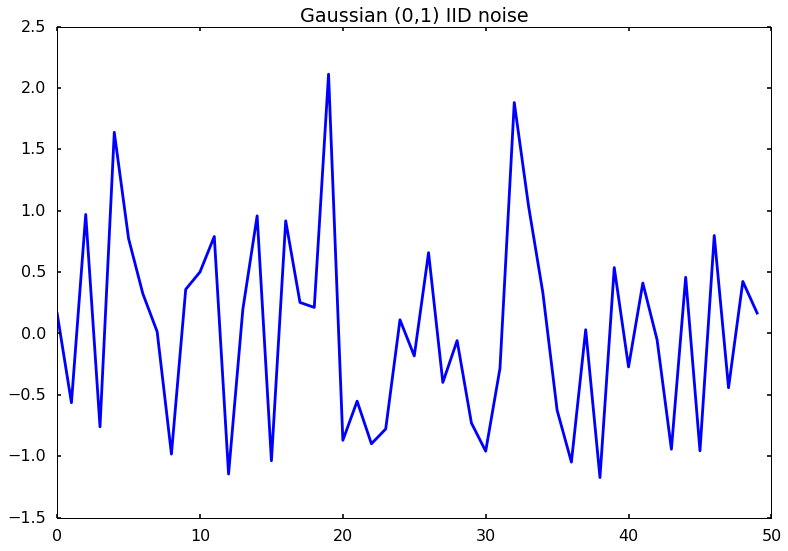

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time series of 50 random data points
# from the “standard normal” distribution (mean zero, standard deviation one)
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn
ts = np.random.randn(50)
# Plot the time series
plt.title("Gaussian (0,1) IID noise")
plt.plot(ts)

##### Random walk 

The random walk is obtained by cumulatively summing iid noise. For example, consider a stock: Assume that every day, the price of the stock changes according to random iid noise. Let's plot the outcome. (Try to run the code a few times and see the different outcomes.)

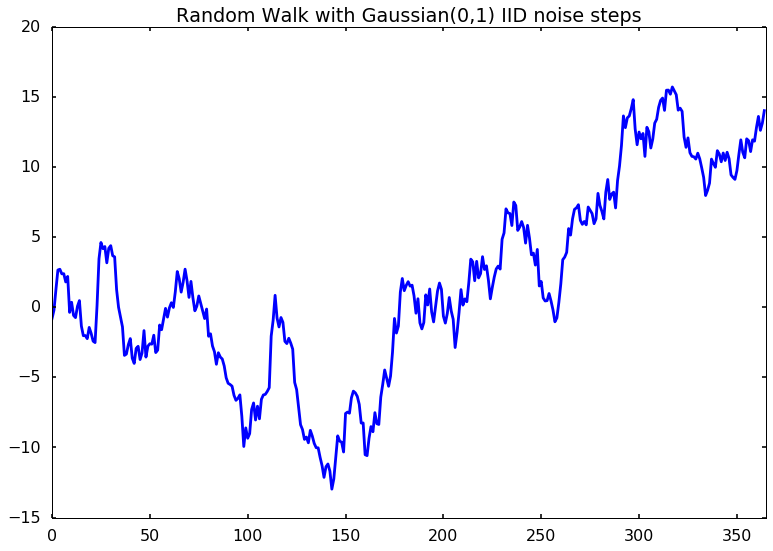

In [25]:
import numpy as np

upper_limit = 365
# Create a time series of random data points
iid_ts = np.random.randn(upper_limit)
# Compute the cumulative sum
random_walk_ts = np.cumsum(iid_ts)
# Plot the time series
plt.title("Random Walk with Gaussian(0,1) IID noise steps")
plt.xlim(0,upper_limit) 
plt.plot(random_walk_ts)

#### A more advanced random walk

In stocks, the overall price of a stock is defined by a cumulative multiplication of daily return. Assuming that the daily returns are log-normal variables (i.e., their log is normally distributed), with a zero mean (i.e., long term the stock remains stable), and a daily variance of 1%, we can construct the following model for stock prices, evolving over a year.

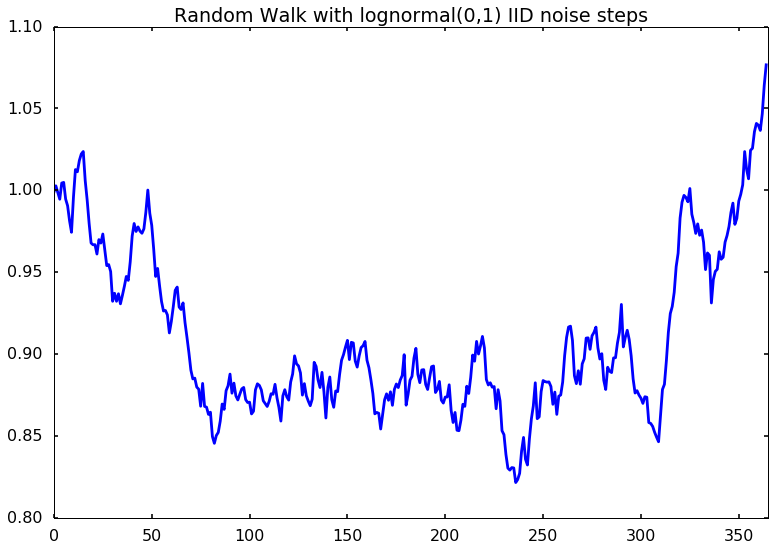

In [26]:
import numpy as np

# The length of our time series
ts_length = 365
# The expected yearly return
mean_yearly_return = 0.0
# Converting the yearly return into a daily return
mean_daily_return = (1+mean_yearly_return)**(1.0/ts_length)-1
# Our expected stock variance each day.
# We set it at a +/- 1% daily movement
daily_variance = 0.01
# Create a time series of random daily returns
iid_ts = np.random.lognormal(mean = mean_daily_return, sigma=daily_variance, size=ts_length)
# Compute the cumulative product
random_walk_ts = np.cumprod(iid_ts)
# Plot the time series
plt.title("Random Walk with lognormal(0,1) IID noise steps")
plt.xlim(0,ts_length) 
plt.plot(random_walk_ts)

##### Simulations: What could have been

Here is not an example of why a model can be useful. When we deal with time series, we often see just one instantiation of the time series, describing what happened. However, we also want to have an understanding what _could_ have happened. For example, we would like to understand better how a stock would move, we could run multiple simulatations and see the expected results. For example, below we will create 1000 simulations of the random walk discussed above, and see the expected results of a stock.

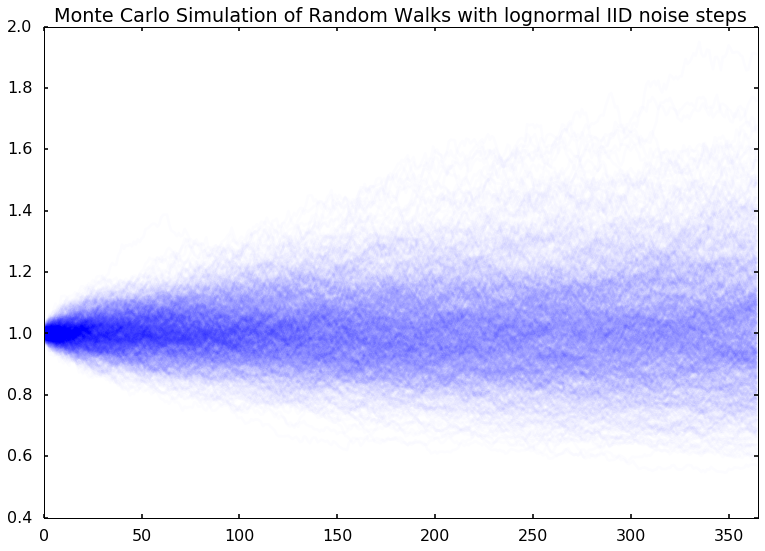

In [27]:
import numpy as np

# The length of our time series
ts_length = 365
# The expected yearly return
mean_yearly_return = 0.0
# Converting the yearly return into a daily return
mean_daily_return = (1+mean_yearly_return)**(1.0/ts_length)-1
# Our expected stock variance each day.
# We set it at a +/- 1% daily movement
daily_variance = 0.01

# We will do 1000 simulations of the random walk
plt.title("Monte Carlo Simulation of Random Walks with lognormal IID noise steps")
plt.xlim(0,upper_limit)
for _ in range(1000):
    # Create a time series of random daily returns
    iid_ts = np.random.lognormal(mean = mean_daily_return, sigma=daily_variance, size=ts_length)
    # Compute the cumulative product
    random_walk_ts = np.cumprod(iid_ts)
    # Add the line in the plot. 
    # We set the transparency of each line to be high (alpha=0.01 means 99% transparent) 
    plt.plot(random_walk_ts, alpha=0.01, color='b')


##### Plotting Quantiles

And now we will take this Monte Carlo simulation, and we will compute the quantiles of the simulation. 

Specifically, we will examine the threshold for the 10% lowest performing stocks, the 25% lowest perfoming stocks, 50%, 75%, and 90%. For that we first create a dataframe, with multiple columns, one column per single simulation of the time series. Then, we run the [`quantile`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html) command, computing the quantile numbers for each row of the dataframe (hence the use of `axis=1`). This returns a dataframe with 5 rows (one row per quantile), and 365 columns; to reshape it, we take the _transpose_ (hence the `.T` at the end) and we plot the result.

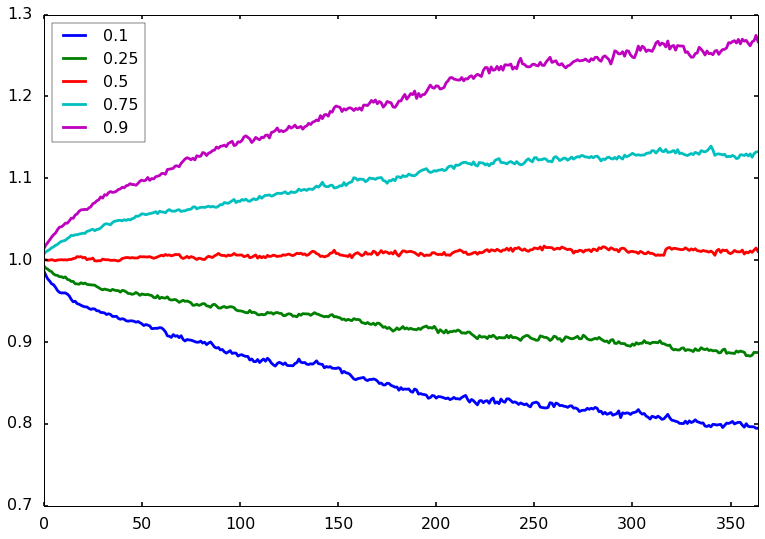

In [28]:
import numpy as np

df = pd.DataFrame()

# The length of our time series
ts_length = 365
# The expected yearly return
mean_yearly_return = 0.0
# Converting the yearly return into a daily return
mean_daily_return = (1+mean_yearly_return)**(1.0/ts_length)-1
# Our expected stock variance each day.
# We set it at a +/- 1% daily movement
daily_variance = 0.01

# We will do 1000 simulations of the random walk
for x in range(1000):
    # Create a time series of random daily returns
    iid_ts = np.random.lognormal(mean = mean_daily_return, sigma=daily_variance, size=ts_length)
    # Compute the cumulative product
    random_walk_ts = np.cumprod(iid_ts)
    # Add the line in the dataframe. 
    df.insert(x, "Run"+str(x), random_walk_ts)

quantiles = df.quantile(q=[0.1,0.25,0.5,0.75,0.90], axis=1).T
quantiles.plot()


#### Models with Trend and Seasonality

In several of the time series examples shown earlier, there is a clear trend in the data. An increasing trend is apparent in both the Australian red wine sales and the population of the U.S.A. In both cases a zero-mean model for the data is clearly inappropriate. The graph of the population data, which contains no apparent periodic component, suggests trying a model of the form $X_t =  m_t +Y_t$ where $m_t$ is the a time series called the *trend component* and $Y_t$ is a time series with zero mean (see above). 


##### Extracting the trend component

One technique that we can use to extract the trend component from a time series is by fitting a function to the time series, using for example the _least squares_ procedure. For example, for the US population date, we will try to fit a quadratic function of the form:

$m_t = a_2 \cdot t^2 + a_1 \cdot t + a_0$

To ﬁt a function of the to the population data we will first normalize the year data, and relabel the time axis so that $t=1$ corresponds to 1780 and $t=24$ corresponds to 2010. Then we will utilize the `statsmodel` package of Python to fit an ordinary least squares.

In [29]:
import statsmodels.formula.api as sm

df = pd.read_csv("us-population2.txt", sep=' ', thousands=',')
df["US_Population"] = pd.to_numeric(df["US_Population"])
# Normalize/relabel the time variables
df["Year_Norm"] = (pd.to_numeric(df["Year"])-1770)/10
# Add a "constant" column, to be used later while we fit the trend function
df["Constant"] = [1]*len(df)


In [30]:
# Fit a function using the ordinary least squares process (OLS)
model = sm.ols(formula = 'US_Population ~ np.power(Year_Norm, 2) + Year_Norm + Constant', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          US_Population   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Sun, 24 Jan 2016   Prob (F-statistic):           2.14e-32
Time:                        14:32:19   Log-Likelihood:                -391.41
No. Observations:                  24   AIC:                             788.8
Df Residuals:                      21   BIC:                             792.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept               4.846e+06   1.04e+06      4.641      0.000      2.67e+06  7.02e+06
np.power(Year_Norm, 2)  6.666e+05   1.49e+04     44.605      0.000      6.36e+05  6.98e+05
Year_Norm              -3.683e+06   3.85e+05     -9.569      0.000     -4.48e+06 -2.88e+06
Constant                4.846e+06   1.04e+06      4.641      0.000      2.67e+06  7.02e+06
==============================================================================
Omnibus:                       12.848   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.450
Skew:                          -1.452   Prob(JB):                      0.00326
Kurtosis:                       4.737   Cond. No.                     5.24e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.45e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# Plotting using Matplotlib directly
# fig, ax = plt.subplots(figsize=(15,10))
# ax.plot(df["Year"], df["US_Population"], 'o', label="data")
# ax.plot(df["Year"], df["Prediction"], 'r--.', label="prediction")
# ax.legend(loc='best');

In [32]:
# Adding predictions in the dataframe, removing unecessary columns
# setting Year as the index, and calculating residuals
df["Prediction"] = pd.to_numeric(model.fittedvalues).astype(int)
df.set_index(keys="Year", inplace=True)
df.drop(["Year_Norm", "Constant"], axis=1, inplace=True)
df["Residuals"] = df["US_Population"] - df["Prediction"]

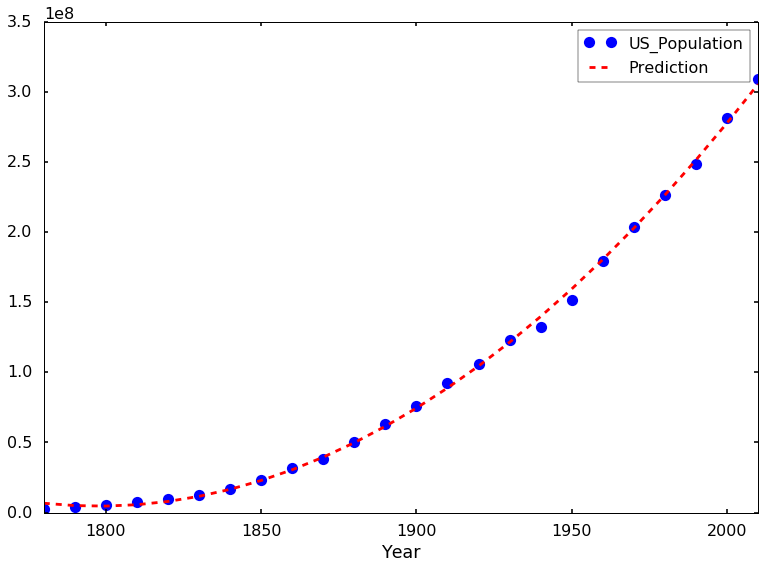

In [33]:
# Plotting the actual data and the prediction
df[["US_Population","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])

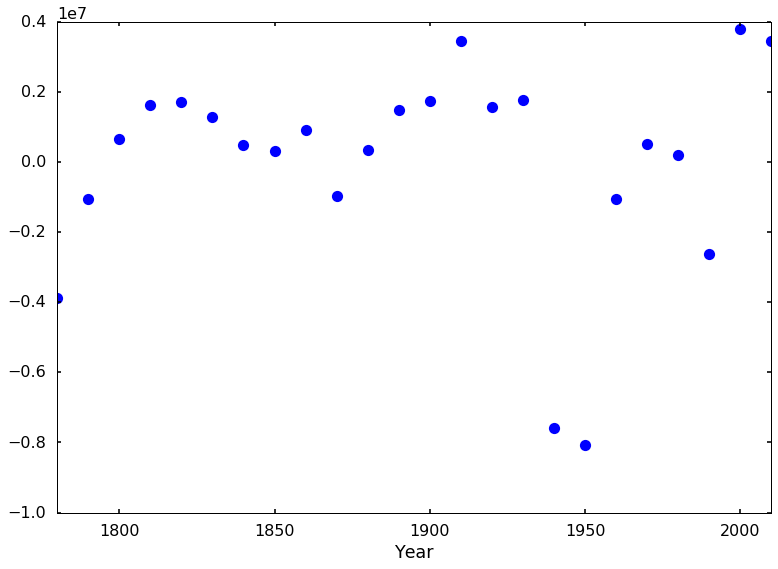

In [34]:
# Plotting the residuals
df["Residuals"].plot(style='bo')

In [35]:
# Now 

future = {"Year_Norm":25, "Year":2020, "Constant":1}
print int(model.predict(future)[0])
future = {"Year_Norm":26, "Year":2030, "Constant":1}
print int(model.predict(future)[0])

334272340
364588126


We will now repeat the process for the Lake Huron dataset

In [36]:
df = pd.read_csv("lake-huron.txt", sep='\t')
df["Year_Norm"] = (pd.to_numeric(df["Year"])-1874)
# Add a "constant" column, to be used later while we fit the trend function
df["Constant"] = [1]*len(df)

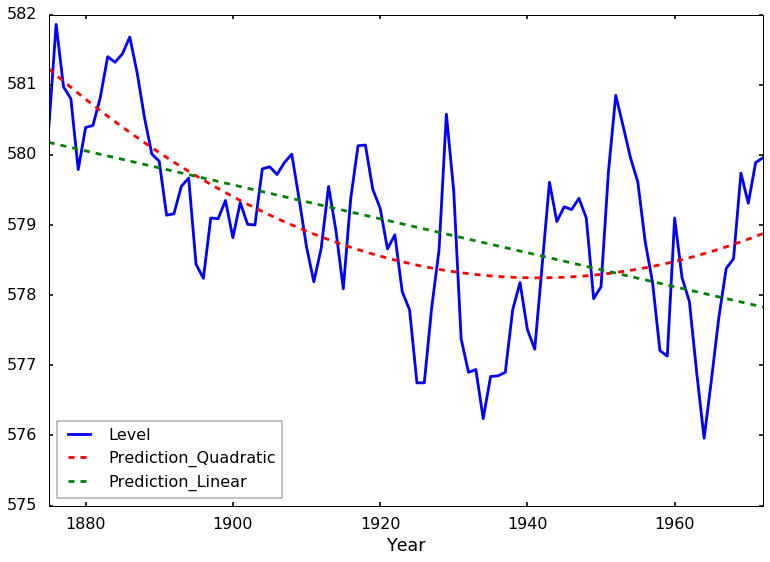

In [37]:
model_quadratic = sm.ols(formula = 'Level ~ np.power(Year_Norm, 2) + Year_Norm + Constant', data = df).fit()
model_linear = sm.ols(formula = 'Level ~ Year_Norm + Constant', data = df).fit()

df["Prediction_Quadratic"] = pd.to_numeric(model_quadratic.fittedvalues)
df["Prediction_Linear"] = pd.to_numeric(model_linear.fittedvalues)
df.set_index(keys="Year", inplace=True)
df.drop(["Year_Norm", "Constant"], axis=1, inplace=True)
df["Residuals_Quadratic"] = df["Level"] - df["Prediction_Quadratic"]
df["Residuals_Linear"] = df["Level"] - df["Prediction_Linear"]
df[["Level","Prediction_Quadratic", "Prediction_Linear"]].plot(style=['b-','r--', 'g--'], 
                                                               label=["data", "prediction (quadratic)", "prediction (linear)"])

Let's take a look at the residuals.

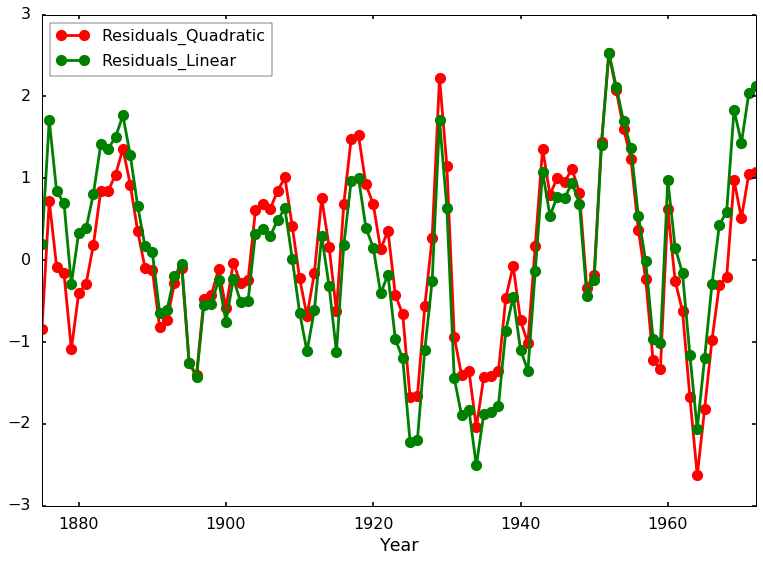

In [38]:
df[["Residuals_Quadratic", "Residuals_Linear"]].plot(style=['ro-','go-'])

### Lag Plots and Autocorrelation

One interesting thing about these residuals is that they are "smooth", and that the sign of the error at time $t$ seems to be predictive of the sign of the erorr at time $t+1$. Such dependency would indicate that there is a *autocorrelation* in the errors. We can use two types of plots to assess the existence of autocorrelation.

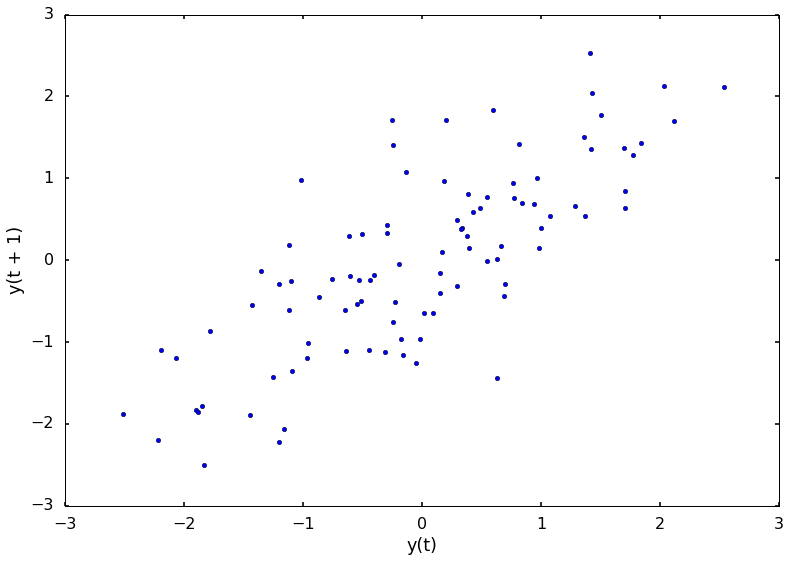

In [39]:
from pandas.tools.plotting import lag_plot
lag_plot(df["Residuals_Linear"])

This lag plot indicates a clear linear dependency between two consecutive residual values, signaling an autocorrelation

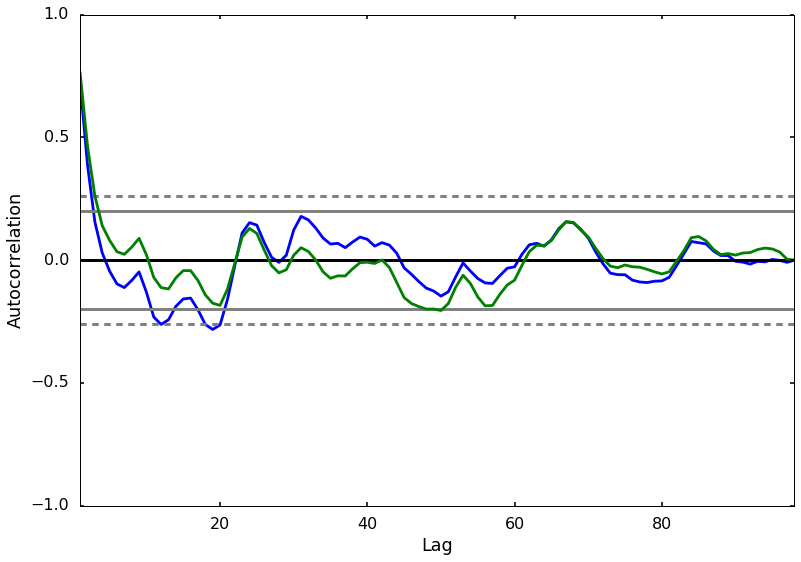

In [40]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df["Residuals_Quadratic"])
autocorrelation_plot(df["Residuals_Linear"])

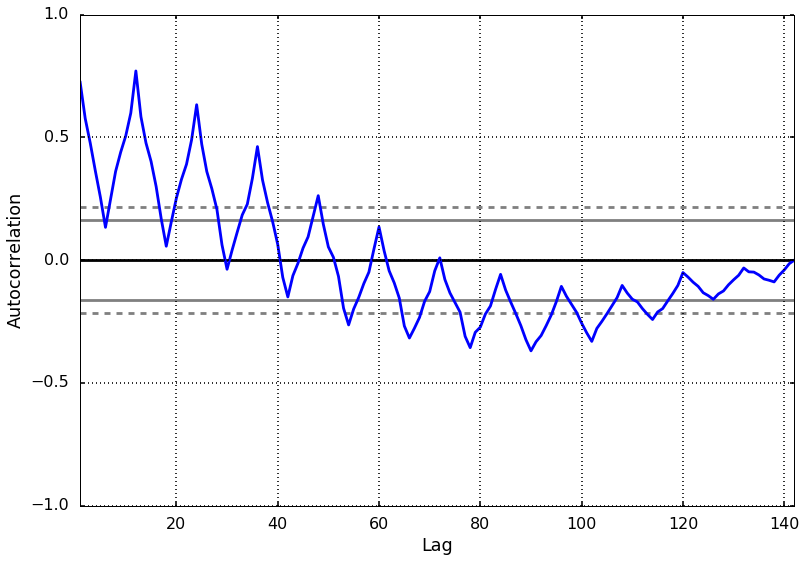

In [41]:
df = pd.read_csv("australian-wine-sales.txt", sep='\t')
df["Date"] = pd.to_datetime(df["Date"], unit='m')
df["Sales"] = pd.to_numeric(df["Sales"])
df.set_index(keys="Date", inplace=True)
autocorrelation_plot(df["Sales"])


#### A General Approach to Time Series Modeling

### Stationary Models and the Autocorrelation Function
#### The Sample Autocorrelation Function
#### A Model for the Lake Huron Data

### Estimation and Elimination of Trend and Seasonal Components
####  Estimation and Elimination of Trend in the Absence of Seasonality
#### Estimation and Elimination of Both Trend and Seasonality

### Testing the Estimated Noise Sequence

### Problems

### Additional Resources

* [fecon235 :: Computational data tools for financial economics](https://github.com/rsvp/fecon235)
    
* [Timeseries Classification: KNN & DTW](http://nbviewer.jupyter.org/github/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping/blob/master/K_Nearest_Neighbor_Dynamic_Time_Warping.ipynb)

* [Timeseries with pandas](http://nbviewer.jupyter.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb)

* [Financial data analysis with Pandas.](http://nbviewer.jupyter.org/gist/twiecki/3962843)

* conference.scipy.org/scipy2011/slides/mckinney_time_series.pdf